##E-waste tracking##
analyzes and graphs data from e-waste index in UN report (see data)

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 61.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import folium
import plotly.express as px
from cartopy.io.shapereader import natural_earth

# Load cleaned dataset
df = pd.read_csv("/content/country_data.csv")

# Ensure relevant numeric columns exist
df["E-WASTE GENERATED (MILLION KG)"] = pd.to_numeric(df["E-WASTE GENERATED (MILLION KG)"], errors='coerce')
df["E-WASTE DOCUMENTED AS FORMALLY COLLECTED AND RECYCLED (MILLION KG)"] = pd.to_numeric(df["E-WASTE DOCUMENTED AS FORMALLY COLLECTED AND RECYCLED (MILLION KG)"], errors='coerce')

# Calculate difference in waste generated vs recycled
df["E-WASTE DISCARDED (MILLION KG)"] = df["E-WASTE GENERATED (MILLION KG)"] - df["E-WASTE DOCUMENTED AS FORMALLY COLLECTED AND RECYCLED (MILLION KG)"]
df["PERCENTAGE E-WASTE RECYCLED"] = df["E-WASTE DOCUMENTED AS FORMALLY COLLECTED AND RECYCLED (MILLION KG)"] / df["E-WASTE GENERATED (MILLION KG)"]
df["PERCENTAGE E-WASTE DISCARDED"] = df["E-WASTE DISCARDED (MILLION KG)"] / df["E-WASTE GENERATED (MILLION KG)"]

In [ ]:
df.head()

,Country,Region,E-WASTE GENERATED (MILLION KG),E-WASTE GENERATED (KG/CAPITA),E-WASTE DOCUMENTED AS FORMALLY COLLECTED AND RECYCLED (MILLION KG),REFERENCE FOR E-WASTE COLLECTION AND RECYCLING DATA,NATIONAL E-WASTE LEGISLATION/ POLICY OR REGULATION IN PLACE,EPR FOR E-WASTE,COLLECTION TARGET IN PLACE,RECYCLING TARGETS IN PLACE,E-WASTE DISCARDED (MILLION KG),PERCENTAGE E-WASTE RECYCLED,PERCENTAGE E-WASTE DISCARDED
0,Afghanistan,Asia,32.0,0.8,0.0,NaN,No,No,No,NaN,32.0,0.0,1.0
1,Albania,Europe,24.0,8.3,0.0,NaN,Yes,Yes,No,NaN,24.0,0.0,1.0
2,Algeria,Africa,333.0,7.5,0.0,NaN,No,No,No,NaN,333.0,0.0,1.0
3,Angola,Africa,148.0,4.2,0.0,NaN,No,No,No,NaN,148.0,0.0,1.0
4,Antigua and Barbuda,Americas,1.0,13.3,0.0,NaN,No,No,No,NaN,1.0,0.0,1.0


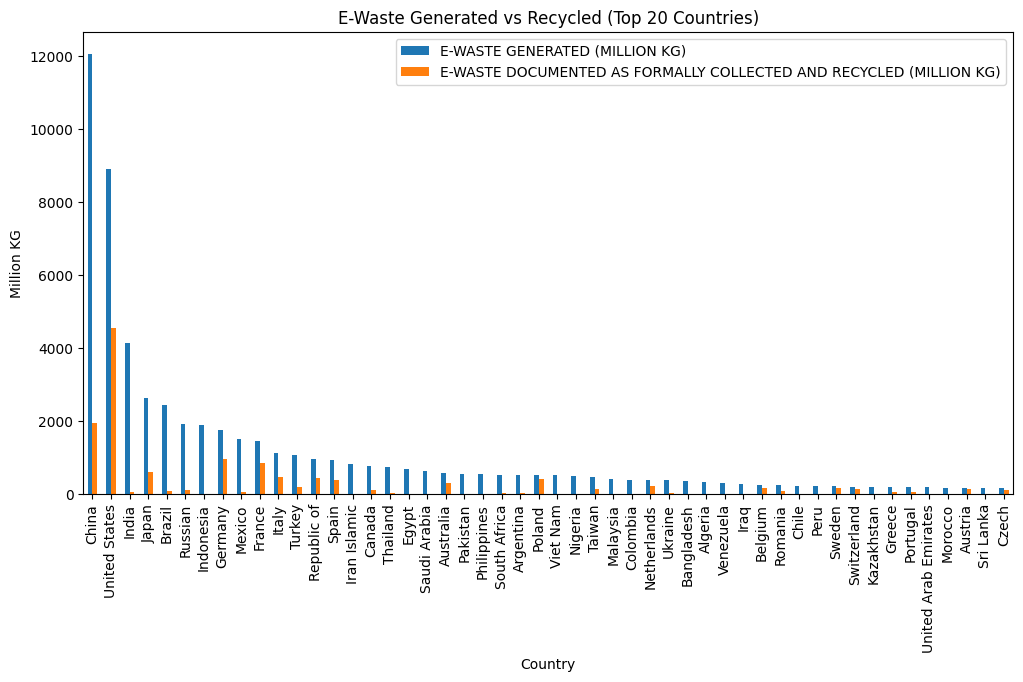

In [ ]:
# 1. Bar plot for e-waste generated vs recycled
df_sorted = df.sort_values("E-WASTE GENERATED (MILLION KG)", ascending=False).head(50)
df_sorted.plot(x="Country", y=["E-WASTE GENERATED (MILLION KG)", "E-WASTE DOCUMENTED AS FORMALLY COLLECTED AND RECYCLED (MILLION KG)"], kind="bar", figsize=(12, 6))
plt.title("E-Waste Generated vs Recycled (Top 20 Countries)")
plt.ylabel("Million KG")
plt.xticks(rotation=90)
plt.show()

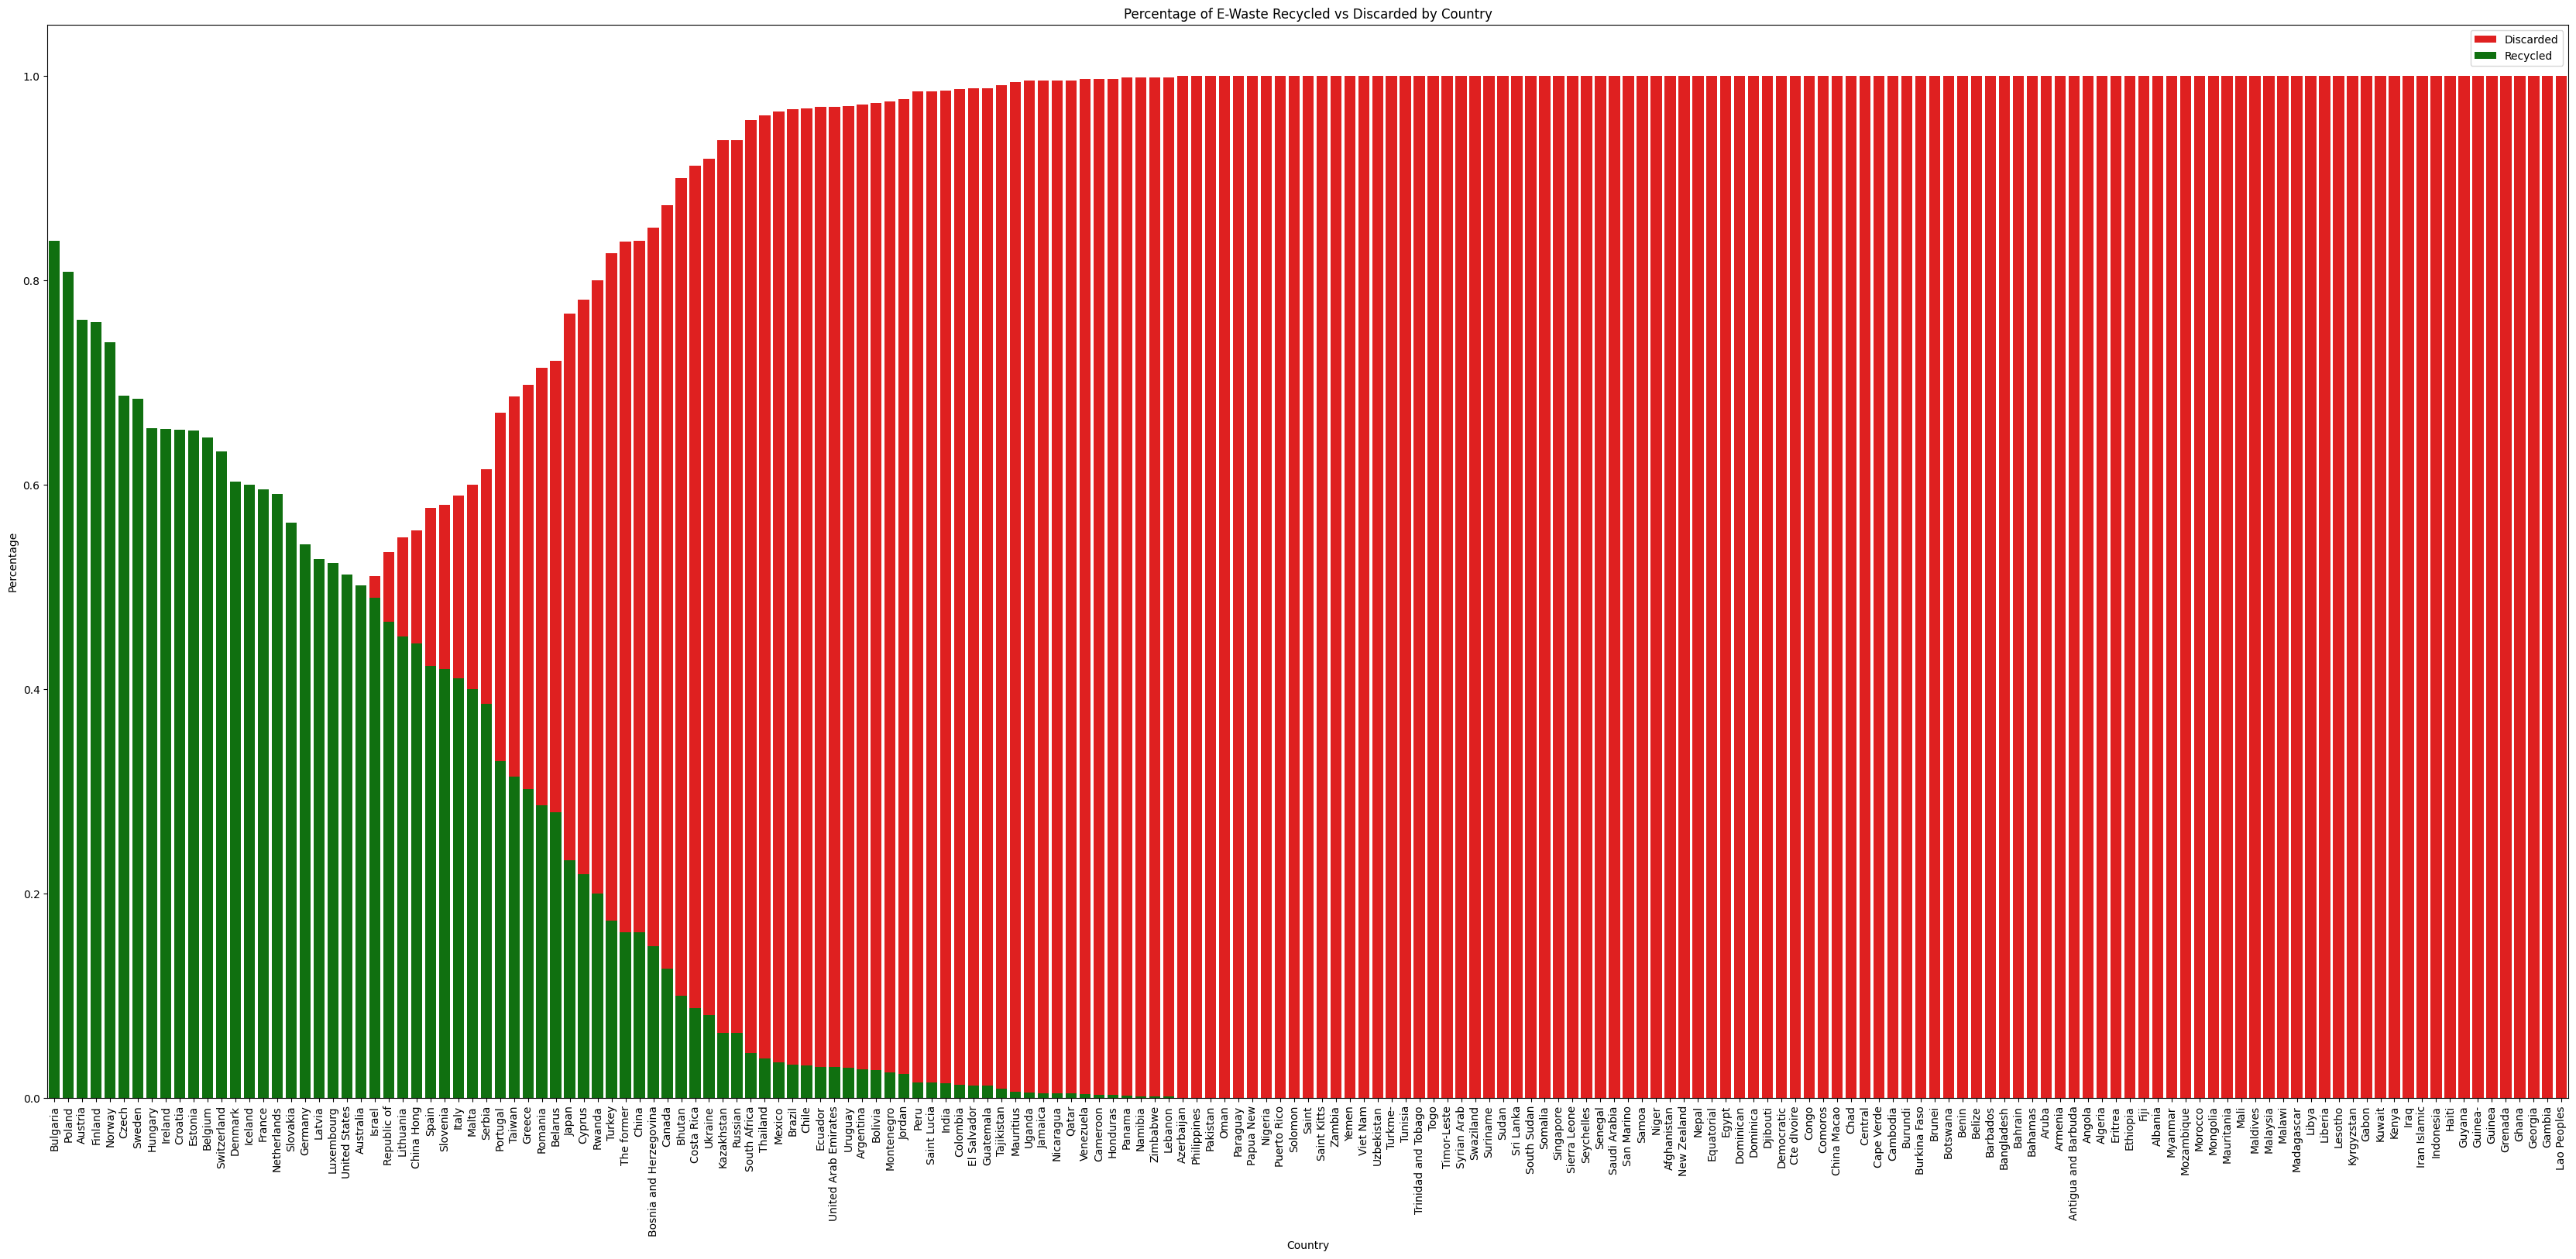

In [ ]:
df_sorted = df.sort_values("PERCENTAGE E-WASTE RECYCLED", ascending=False)

# Bar plot of recycling vs discarded percentages
plt.figure(figsize=(42, 18))
sns.barplot(x=df_sorted["Country"], y=df_sorted["PERCENTAGE E-WASTE DISCARDED"], color="red", label="Discarded")
sns.barplot(x=df_sorted["Country"], y=df_sorted["PERCENTAGE E-WASTE RECYCLED"], color="green", label="Recycled")

plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.title("Percentage of E-Waste Recycled vs Discarded by Country")
plt.legend()
plt.show()


In [ ]:

#Flow visualization using Plotly
fig = px.scatter_geo(df, locations="Country", locationmode="country names", size="E-WASTE GENERATED (MILLION KG)",
                     title="Global E-Waste Flow", color="E-WASTE GENERATED (MILLION KG)", hover_name="Country",
                     projection="natural earth")
fig.show()

In [ ]:
df.dropna(subset=["PERCENTAGE E-WASTE DISCARDED"], inplace=True)
fig2 = px.scatter_geo(df, locations="Country", locationmode="country names", size="PERCENTAGE E-WASTE DISCARDED",
                     title="Global E-Waste Flow", color="PERCENTAGE E-WASTE DISCARDED", hover_name="Country",
                     projection="natural earth")
fig2.show()

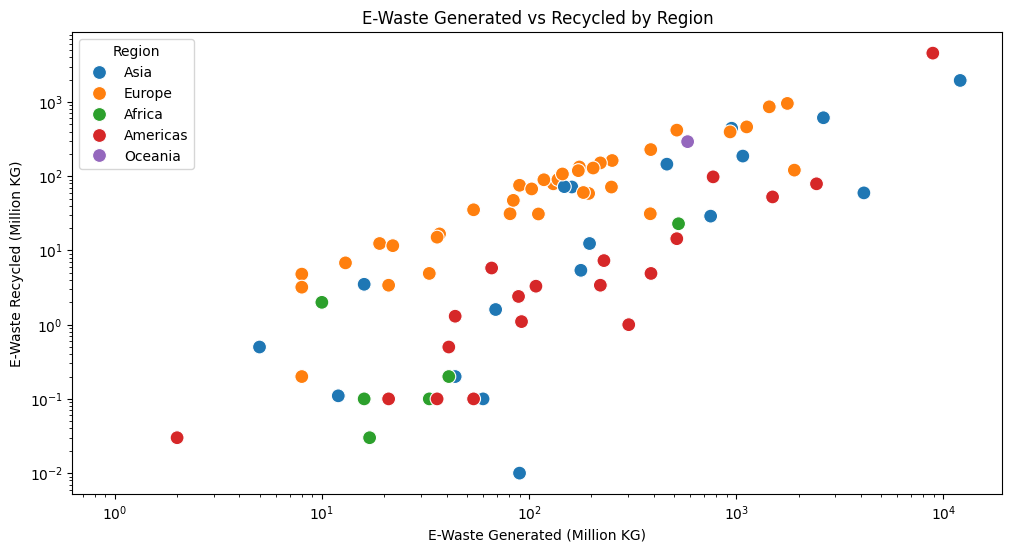

In [ ]:
# Scatter Plot - E-Waste Generated vs Recycled with Regions
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["E-WASTE GENERATED (MILLION KG)"], y=df["E-WASTE DOCUMENTED AS FORMALLY COLLECTED AND RECYCLED (MILLION KG)"], hue=df["Region"], s=100)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("E-Waste Generated (Million KG)")
plt.ylabel("E-Waste Recycled (Million KG)")
plt.title("E-Waste Generated vs Recycled by Region")
plt.show()

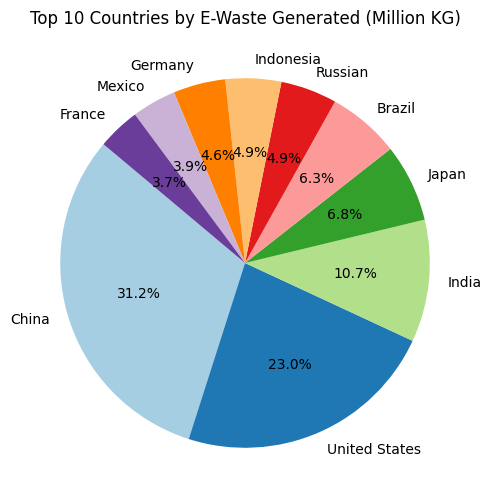

In [ ]:
# Pie Chart - Global Share of E-Waste Generated by Top 10 Countries
top_10_countries = df.nlargest(10, "E-WASTE GENERATED (MILLION KG)")
plt.figure(figsize=(10, 6))
plt.pie(top_10_countries["E-WASTE GENERATED (MILLION KG)"], labels=top_10_countries["Country"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired", 10))
plt.title("Top 10 Countries by E-Waste Generated (Million KG)")
plt.show()

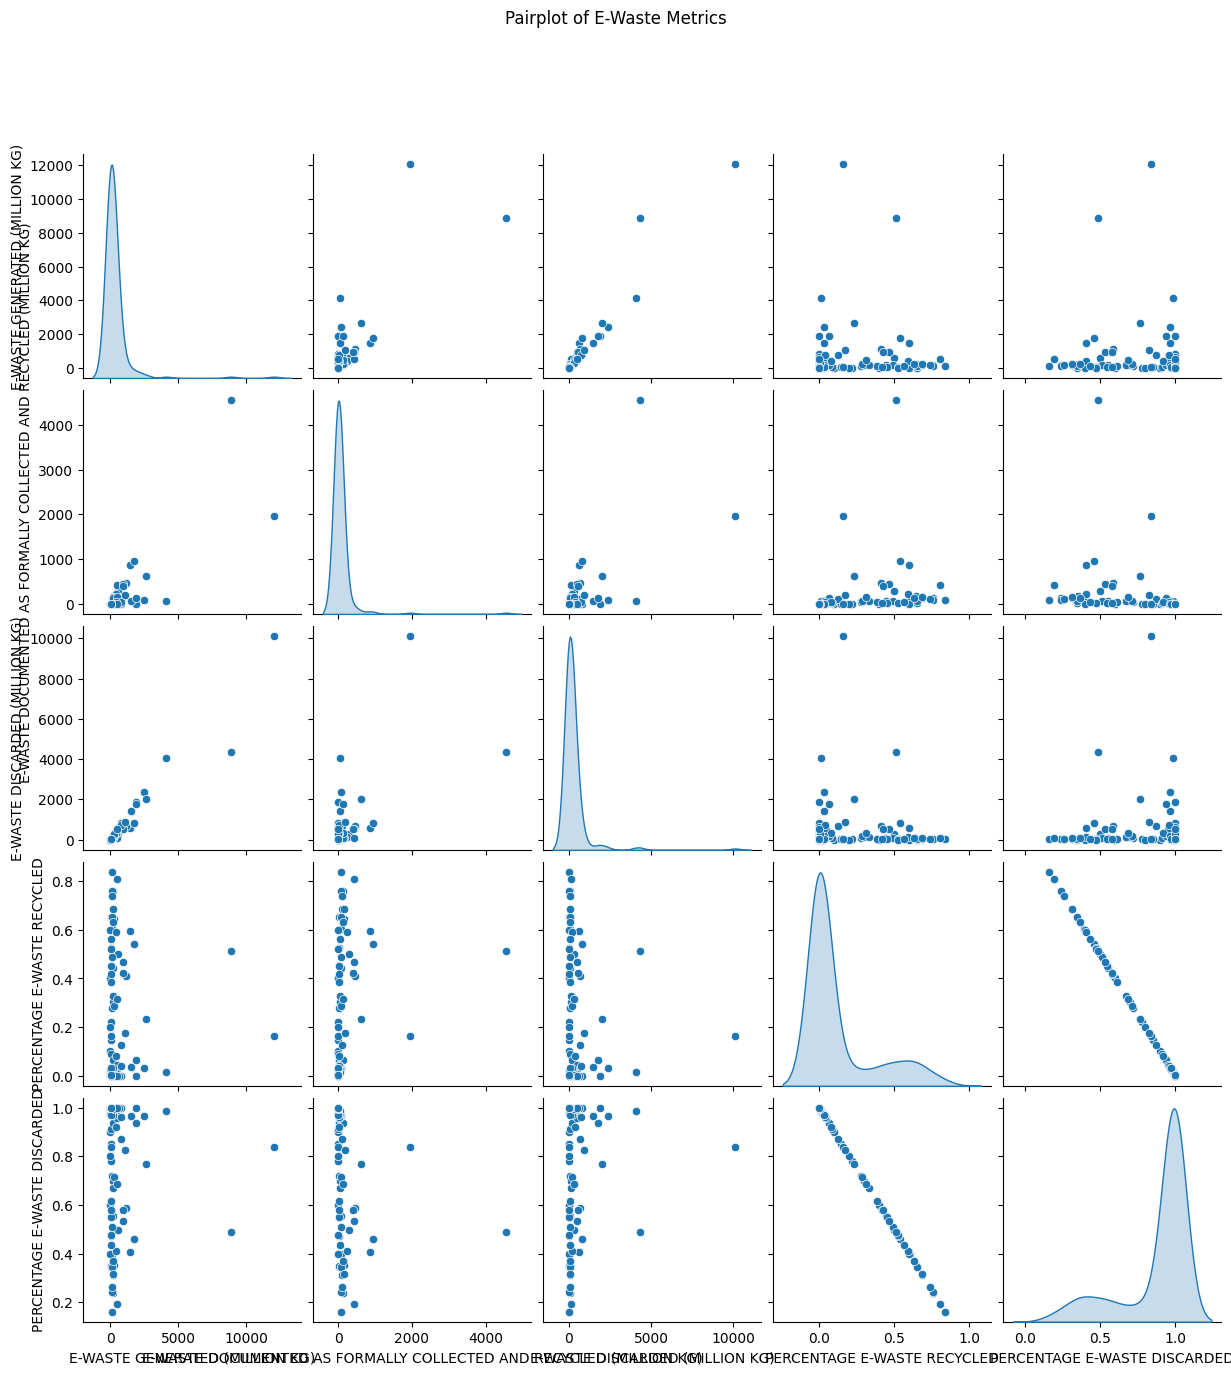

In [ ]:
# Pairplot
sns.pairplot(df[["E-WASTE GENERATED (MILLION KG)", "E-WASTE DOCUMENTED AS FORMALLY COLLECTED AND RECYCLED (MILLION KG)",
                 "E-WASTE DISCARDED (MILLION KG)", "PERCENTAGE E-WASTE RECYCLED", "PERCENTAGE E-WASTE DISCARDED"]], diag_kind='kde')
plt.suptitle("Pairplot of E-Waste Metrics", y=1.1)
plt.show()



In [ ]:
df.describe()

,E-WASTE GENERATED (MILLION KG),E-WASTE GENERATED (KG/CAPITA),E-WASTE DOCUMENTED AS FORMALLY COLLECTED AND RECYCLED (MILLION KG),E-WASTE DISCARDED (MILLION KG),PERCENTAGE E-WASTE RECYCLED,PERCENTAGE E-WASTE DISCARDED
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,342.082873,9.445948,76.441492,265.641381,0.124064,0.875936
std,1201.253313,7.034197,384.950473,919.377964,0.227303,0.227303
min,1.000000,0.500000,0.000000,1.000000,0.000000,0.161111
25%,13.000000,2.200000,0.000000,12.000000,0.000000,0.900000
50%,44.000000,8.700000,0.000000,37.800000,0.000000,1.000000
75%,178.000000,14.200000,12.400000,122.700000,0.100000,1.000000
max,12066.000000,26.800000,4554.700000,10114.300000,0.838889,1.000000
